# Midterm Report: Regression, p-Hacking, Lab18

In [6]:
!pip3 install --user pandas
!pip3 install --user numpy
!pip3 install --user statsmodels
!pip3 install --user scipy

Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/pip/_vendor/__init__.py", line 33, in vendored
    __import__(vendored_name, globals(), locals(), level=0)
ImportError: No module named 'pip._vendor.pkg_resources'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/bin/pip3", line 9, in <module>
    from pip import main
  File "/usr/lib/python3/dist-packages/pip/__init__.py", line 13, in <module>
    from pip.exceptions import InstallationError, CommandError, PipError
  File "/usr/lib/python3/dist-packages/pip/exceptions.py", line 6, in <module>
    from pip._vendor.six import iteritems
  File "/usr/lib/python3/dist-packages/pip/_vendor/__init__.py", line 75, in <module>
    vendored("pkg_resources")
  File "/usr/lib/python3/dist-packages/pip/_vendor/__init__.py", line 36, in vendored
    __import__(modulename, globals(), locals(), level=0)
  File "<frozen importlib._bootstrap>", line 969, in _fin

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tools import eval_measures
import statsmodels.api as sm
%matplotlib inline

In [34]:
# a function to perform OLS regression
# parameter X: a numpy matrix (n * p) for independent variables, this matrix SHOULD NOT contain the column of intercepts
# parameter y: a numpy vector (n * 1) for dependent variable
# return sm.OLS().fit() results
# the function also prints out OLS regression results
def ols_regression(X, y):
    X = sm.add_constant(X) # add a constant term column to the X matrix
    X = X.astype(float)
    y = y.astype(float)
    
    # run the regression
    regr = sm.OLS(y, X) # sm.OLS() function can take numpy arrays as parameters to form the regression function
    results = regr.fit()
    print(results.summary())
    #xname= ['Constant','FRL Rate', 'S:T Ratio', 'Droupout Rate', 'Disciplinary Acts Rate', 'Urban-Centric Locale Number'])

    return results

In [35]:
# read in data from csv file
# reading 2005 data
# df05 = pd.read_csv("2005.csv", sep=',', header=0, parse_dates=[0])
# school_indicators05 = df05.values
# number_of_data_points = school_indicators05.shape[0]
# print('The shape of the input data is:', school_indicators05.shape)

#reading 2010 data
df10 = pd.read_csv("Source_2010_woPASC_csv.csv", sep=',', header=0, parse_dates=[0])
school_indicators10= df10.values
number_of_data_points = school_indicators10.shape[0]
print('The shape of the input data is:', school_indicators10.shape)

#reading 2012 data
df12 = pd.read_csv("Source_2012_woCHER_csv.csv", sep=',', header=0, parse_dates=[0])
school_indicators12= df12.values
number_of_data_points = school_indicators12.shape[0]
print('The shape of the input data is:', school_indicators12.shape)

#reading 2014 data

df14 = pd.read_csv("Source_2014_woCHER_csv.csv", sep=',', header=0, parse_dates=[0])
school_indicators14= df14.values
number_of_data_points = school_indicators14.shape[0]
print('The shape of the input data is:', school_indicators14.shape)


The shape of the input data is: (114, 37)
The shape of the input data is: (114, 37)
The shape of the input data is: (114, 37)


# 1. Basic OLS regression

We've already provided the function `ols_regression(X, y)` which takes a numpy matrix `X` for dependent variables and a numpy vector `y` for the independent variable and then performs the OLS regression. The major function that actually performs the OLS regression is [`statsmodels.regression.linear_model.OLS`](http://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS). You could read its official document to know what parameters it should take, and what functions it could perform. 

And we've read in the data from the `csv` file as a numpy matrix. As you could see from the previous cell, the input data has `785` rows and `13` columns.

In this part we've defined an OLS regression for you. Run the following cell to get the regression outputs. Then you'll need to interpret them.

In [29]:
# Identification: 
# index 0 is LEA Code
# index 1 is LEA 

# Dependent Variables: 
# index 4 is Attrition rate
# index 2,3 are the numbers to get the attrition rate

dep_vars10 = school_indicators10[:, [4]]
dep_vars12 = school_indicators12[:, [4]]
dep_vars14 = school_indicators14[:, [4]]
# BELOW-- notes from lab 5
# in this example we consider the sum of all the indicators as y. 
# you are welcome to use just one of the variables or a linear combination of these variables
# y = np.sum(dep_vars, axis=1)
y10 = dep_vars10
y12 = dep_vars12
y14 = dep_vars14
yALL = np.concatenate((y10, y12,y14), axis=0)


# select your independent variables (political indicators)
# index 5 is daily attendance 
# index 6 is students w/ reduced lunch
# index 7 is students w/ free lunch
# index 8 is FRL rate (percentage)
# index 9 is Student:Teacher Ratio
# index 10 is total students dropout
# index 11 is dropout rate
# index 12 is total disciplinary actions committed  
# index 13 is Acts per 1000 students
# index 14 is Total expenditures per pupil
# index 16 is instructional expend per pupil
# index 18 is Native american percentage
# index 20 is Asian percentage
# index 22 is Hispanic Percentage
# index 24 is Black percentage
# index 26 is White percentage
# index 28 is Hawaiian + pacific isl percentage
# index 30 is 2+ percentage
# index 36 is urban-centric local number 

# using:
# x1 = FRL rate
# x2 = S:T ratio
# x3 = droupout rate
# x4 = actions:student ratio


indep_vars10 = school_indicators10[:, [8,9,11,13,36]]

X10 = indep_vars10

indep_vars12 = school_indicators12[:, [8,9,11,13,36]]
X12 = indep_vars12

indep_vars14 = school_indicators14[:, [8,9,11,13,36]]
X14 = indep_vars14

XALL = np.concatenate((X10, X12, X14), axis = 0)

x10FRL = indep_vars10[:,[0]]
x12FRL = indep_vars12[:,[0]]
x14FRL = indep_vars14[:,[0]]
xALLFRL = np.concatenate((x10FRL, x12FRL, x14FRL), axis = 0)

x10URC = school_indicators10[:, [36]]
x12URC = school_indicators12[:, [36]]
x14URC = school_indicators14[:, [36]]
xALLURC = np.concatenate((x10URC, x12URC, x14URC), axis = 0)





# call the provided function to run OLS regression
# note that input X doesn't have a column for 1's, which will be added in the function
# here we don't use the function return value, but you could use it as you want
print(XALL)

print("2010 results:")
results10 = ols_regression(X10, y10)
print("--------------------------------------------------------------------------------- ")


print("2012 results:")
results12 = ols_regression(X12, y12)
print("--------------------------------------------------------------------------------- ")

print("2014 results:")
results14 = ols_regression(X14, y14)
print("--------------------------------------------------------------------------------- ")



print("COMBINED results:")
resultsALL = ols_regression(XALL, yALL)
print("--------------------------------------------------------------------------------- ")





[[53.16 14.68 3.77 8.18 41]
 [55.65 16.17 3.72 9.54 41]
 [68.42 10.96 4.13 9.68 43]
 ...
 [56.37 16.35 3.1 11.0 42]
 [58.03 14.27 1.17 9.21 42]
 [56.84 12.95 1.61 18.81 42]]
2010 results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     5.635
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           0.000118
Time:                        13:51:14   Log-Likelihood:                -302.46
No. Observations:                 114   AIC:                             616.9
Df Residuals:                     108   BIC:                             633.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     45.17
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           7.62e-11
Time:                        14:34:42   Log-Likelihood:                -1032.0
No. Observations:                 342   AIC:                             2068.
Df Residuals:                     340   BIC:                             2076.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3320      1.270      4.199      0.0

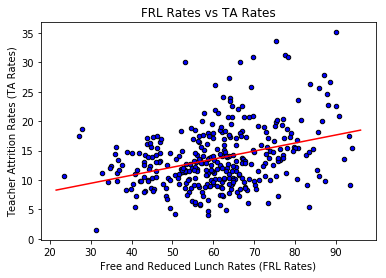

In [41]:
def plot(X, y, b0, b1):
    # define the OLS regression fit function
    def fit(x):

        ###########
        # TODO: compute x based on regression results b0 and b1
        ###########
        return b0 + b1*x
    xrange, yrange = [min(X)-2, max(X)+2], [fit(min(X)-2), fit(max(X)+2)] # generate ranges of X and y to plot the line
    plt.scatter(X, y, c = 'blue', edgecolor = 'black', s = 20) # plot the points
    plt.plot(xrange, yrange, c = 'red') # plot the OLS fit line
    plt.ylabel('Teacher Attrition Rates (TA Rates)')
    plt.xlabel('Free and Reduced Lunch Rates (FRL Rates)')
    plt.title('FRL Rates vs TA Rates')


    plt.show()
    
#plot free/reduced lunch
results = ols_regression(xALLFRL, yALL)
[b0,b1] = results.params # get regression fit coefficients for intercept and X
plot(xALLFRL, yALL, b0, b1)



### 

In [22]:
# define to study republicans or democrats
study_democrats = True

# define which economic variables to use
use_unemployment = True
use_inflation = True
use_stockgrowth = True
use_gdpgrowth = True

# define which X variables to use
use_governor = True
use_senator = True
use_representative = False
use_president = True

In [23]:
# a sum over all selected politician variables
def construct_X(study_democrats, use_governor, use_senator, use_representative, use_president):
    X = np.zeros(number_of_data_points) # create a 1D numpy array, each element is 0
    if use_governor:
        X = X + school_indicators[:, 8 if study_democrats else 5]
    if use_senator:
        X = X + school_indicators[:, 9 if study_democrats else 6]
    if use_representative:
        X = X + school_indicators[:, 10 if study_democrats else 7]
    if use_president:
        X = X + school_indicators[:, 12 if study_democrats else 11]
    return X

In [30]:
# a sum over all selected economic variables
def construct_y(use_unemployment, use_inflation, use_stockgrowth, use_gdpgrowth):
    y = np.zeros(number_of_data_points) # create a 1D numpy array, each element is 0

    ###########
    # TODO: write code to compute y based on use_inflation, et al.
    ###########
        
    return y

In [31]:
def plot(X, y, b0, b1):
    # define the OLS regression fit function
    def fit(x):

        ###########
        # TODO: compute x based on regression results b0 and b1
        ###########
        return x

    xrange, yrange = [min(X)-2, max(X)+2], [fit(min(X)-2), fit(max(X)+2)] # generate ranges of X and y to plot the line
    plt.scatter(X, y, c = 'blue', edgecolor = 'black', s = 20) # plot the points
    plt.plot(xrange, yrange, c = 'red') # plot the OLS fit line
    plt.show()

results = ols_regression(X05, y05)
[b0, b1] = results.params # get regression fit coefficients for intercept and X
plot(X05, y05, b0, b1)

NameError: name 'X05' is not defined

In [32]:
# you don't need to update parameters here
# you could update parameter values where you defined them
X = construct_X(study_democrats, use_governor, use_senator, use_representative, use_president)
y = construct_y(use_unemployment, use_inflation, use_stockgrowth, use_gdpgrowth)

results = ols_regression(X, y)
[b0, b1] = results.params # get regression fit coefficients for intercept and X
plot(X, y, b0, b1)

NameError: name 'construct_X' is not defined